In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
df1 = pd.read_csv('../Data/LA_1970_1978')
df2 = pd.read_csv('../Data/LA_1979_1988')
df3 = pd.read_csv('../Data/LA_1989_1999')
df4 = pd.read_csv('../Data/LA_2000_2023')

main_df = pd.concat((df1, df2, df3, df4)).reset_index(drop=True)

main_df.head()

,id,time,location,latitude,longitude,depth,magnitude,alert,url,eventtype,significance
0,ci3324955,1970-01-02 10:45:20.570,"24km S of Santa Barbara, CA",34.206000,-119.695667,6.0,3.14,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,152
1,ci3324959,1970-01-03 19:48:40.840,"6km NE of Banning, CA",33.960500,-116.830500,6.0,3.16,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,154
2,ci3324960,1970-01-04 02:27:15.700,"8km N of Big Bear City, CA",34.333500,-116.843333,6.0,2.74,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,116
3,ci3324875,1970-01-08 02:16:41.350,"8km NE of Lake Arrowhead, CA",34.307833,-117.139833,6.0,2.75,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,116
4,ci3324882,1970-01-10 02:47:03.430,"10km NNW of Santa Paula, CA",34.435833,-119.112000,6.0,3.03,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,141


In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222284 entries, 0 to 222283
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            222284 non-null  object 
 1   time          222284 non-null  object 
 2   location      222284 non-null  object 
 3   latitude      222284 non-null  float64
 4   longitude     222284 non-null  float64
 5   depth         222284 non-null  float64
 6   magnitude     213208 non-null  float64
 7   alert         67 non-null      object 
 8   url           222284 non-null  object 
 9   eventtype     222284 non-null  object 
 10  significance  222284 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 18.7+ MB


### Calculating distance for longitude and latitude

In [7]:
print(f"{main_df['latitude'].min()}")
print(f"{main_df['latitude'].max()}")

32.704
35.3998333


In [8]:
print(f"{main_df['longitude'].min()}")
print(f"{main_df['longitude'].max()}")

-119.85
-116.6108333


#### Longitude - 92km per degree

In [9]:
#324km separation at 32.563 latitude
print(f"Degree per KM: {(119.7238 - 116.2638) / 324}")
print(f"KM per degree: {324 / (119.7238 - 116.2638)}")

Degree per KM: 0.010679012345678992
KM per degree: 93.64161849711


In [10]:
#313km separation at 35.433 latitude
print(f"Degree per KM: {(119.7238 - 116.2638) / 313}")
print(f"KM per degree: {313 / (119.7238 - 116.2638)}")

Degree per KM: 0.011054313099041514
KM per degree: 90.4624277456649


In [11]:
#319km separation at 34.000 latitude
print(f"Degree per KM: {(119.7238 - 116.2638) / 319}")
print(f"KM per degree: {319 / (119.7238 - 116.2638)}")

Degree per KM: 0.010846394984326
KM per degree: 92.19653179190769


In [12]:
(93.641618 + 90.462428) / 2

92.05202299999999

#### Latitude - 109km per degree

In [13]:
#319km separation at 119.7238 longitude
print(f"Degree per KM: {(35.433 - 32.563) / 313}")
print(f"KM per degree: {313 / (35.433 - 32.563)}")

Degree per KM: 0.00916932907348242
KM per degree: 109.05923344947745


## Light EDA

In [14]:
main_df.head()

,id,time,location,latitude,longitude,depth,magnitude,alert,url,eventtype,significance
0,ci3324955,1970-01-02 10:45:20.570,"24km S of Santa Barbara, CA",34.206000,-119.695667,6.0,3.14,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,152
1,ci3324959,1970-01-03 19:48:40.840,"6km NE of Banning, CA",33.960500,-116.830500,6.0,3.16,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,154
2,ci3324960,1970-01-04 02:27:15.700,"8km N of Big Bear City, CA",34.333500,-116.843333,6.0,2.74,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,116
3,ci3324875,1970-01-08 02:16:41.350,"8km NE of Lake Arrowhead, CA",34.307833,-117.139833,6.0,2.75,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,116
4,ci3324882,1970-01-10 02:47:03.430,"10km NNW of Santa Paula, CA",34.435833,-119.112000,6.0,3.03,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,141


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='magnitude', ylabel='Count'>

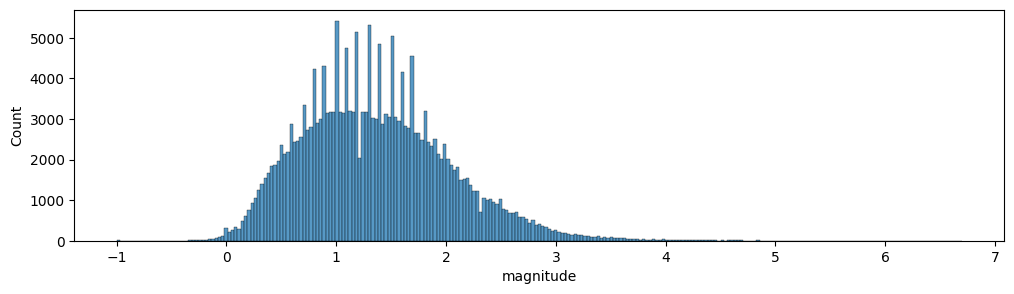

In [16]:
plt.figure(figsize=(12,3))
sns.histplot(x=main_df['magnitude'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='depth', ylabel='Count'>

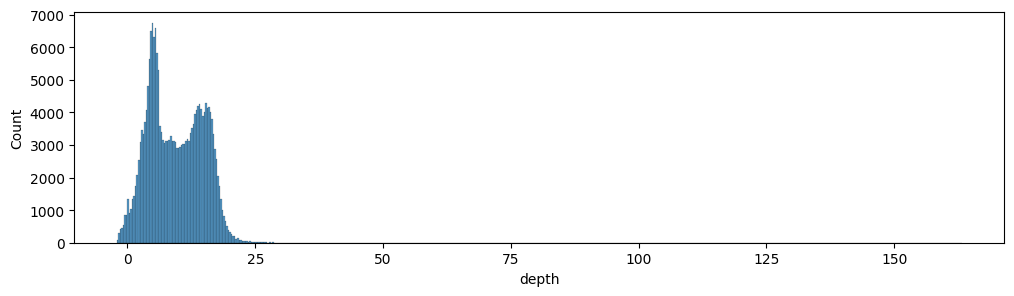

In [19]:
plt.figure(figsize=(12,3))
sns.histplot(x=main_df['depth'])

In [21]:
main_df['eventtype'].value_counts()

eventtype
earthquake    222284
Name: count, dtype: int64

In [22]:
for i in main_df['magnitude'][:10]:
    energy = 10 ** (4.4 + 1.5*i)
    print(f"Magnitude: {i} Energy: {np.round(energy)}")

Magnitude: 3.14 Energy: 1288249552.0
Magnitude: 3.16 Energy: 1380384265.0
Magnitude: 2.74 Energy: 323593657.0
Magnitude: 2.75 Energy: 334965439.0
Magnitude: 3.03 Energy: 881048873.0
Magnitude: 2.8 Energy: 398107171.0
Magnitude: 2.96 Energy: 691830971.0
Magnitude: 2.58 Energy: 186208714.0
Magnitude: 2.79 Energy: 384591782.0
Magnitude: 2.37 Energy: 90157114.0


In [24]:
main_df['energy'] = 10 ** (4.4 + main_df['magnitude'])

In [25]:
main_df['energy'].max()

125892541179.41713

In [26]:
main_df['time'] = pd.to_datetime(main_df['time'])

main_df['year'] = main_df['time'].dt.year

In [27]:
main_df.head()

,id,time,location,latitude,longitude,depth,magnitude,alert,url,eventtype,significance,energy,year
0,ci3324955,1970-01-02 10:45:20.570,"24km S of Santa Barbara, CA",34.206000,-119.695667,6.0,3.14,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,152,3.467369e+07,1970
1,ci3324959,1970-01-03 19:48:40.840,"6km NE of Banning, CA",33.960500,-116.830500,6.0,3.16,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,154,3.630781e+07,1970
2,ci3324960,1970-01-04 02:27:15.700,"8km N of Big Bear City, CA",34.333500,-116.843333,6.0,2.74,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,116,1.380384e+07,1970
3,ci3324875,1970-01-08 02:16:41.350,"8km NE of Lake Arrowhead, CA",34.307833,-117.139833,6.0,2.75,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,116,1.412538e+07,1970
4,ci3324882,1970-01-10 02:47:03.430,"10km NNW of Santa Paula, CA",34.435833,-119.112000,6.0,3.03,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,141,2.691535e+07,1970


In [28]:
main_df['lat_norm'] = (main_df['latitude'] - 34) * 106
main_df['long_norm'] = (main_df['longitude'] + 118) * 92

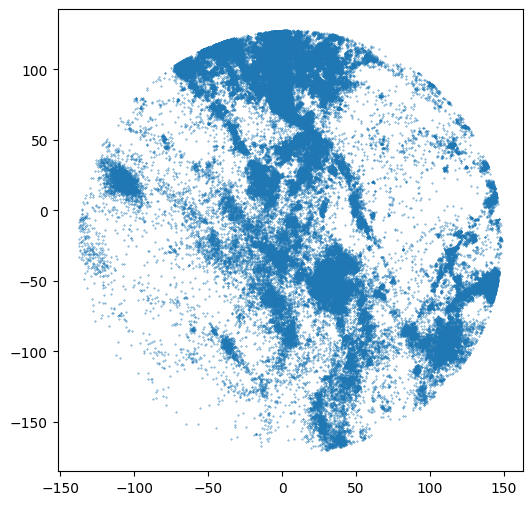

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(data=main_df, x="lat_norm", y = "long_norm", s=0.1 )

In [30]:
main_df['gridpoint'] = list(zip(main_df['lat_norm'], main_df['long_norm']))

In [31]:
lat_grid = (np.linspace(33.00, 35.00, 21) - 34) * 109
long_grid = (np.linspace(-117.00, -119.00, 21) + 118) * 92

In [32]:
#https://stackoverflow.com/questions/1208118/using-numpy-to-build-an-array-of-all-combinations-of-two-arrays
grid_geo = np.array(np.meshgrid(lat_grid, long_grid)).T.reshape(-1,2)
len(grid_geo)

441

To normalize longitude into kilometer measures:


* (LONGITUDE + 118) * 92
* (LATITUDE - 34) * 109

### Calculate distance

In [33]:
import math

In [34]:
math.dist(grid_geo[0], main_df['gridpoint'][0])

280.3974353523695

In [35]:
main_df.iloc[0]

id                                                      ci3324955
time                                   1970-01-02 10:45:20.570000
location                              24km S of Santa Barbara, CA
latitude                                                   34.206
longitude                                             -119.695667
depth                                                         6.0
magnitude                                                    3.14
alert                                                         NaN
url             https://earthquake.usgs.gov/earthquakes/eventp...
eventtype                                              earthquake
significance                                                  152
energy                                            34673685.045253
year                                                         1970
lat_norm                                                   21.836
long_norm                                             -156.001336
gridpoint 

In [36]:
test_point = grid_geo[0]
earthquake_start = main_df['energy']


In [38]:
energy_df = pd.DataFrame((grid_geo[:,0], grid_geo[:,1])).T
energy_df.columns = ['Latitude','Longitude']

for year in range(1971,2024):
    df = main_df[main_df['year']==year].reset_index(drop=True)
    point_energy_list = []
    for j in grid_geo:
        point_energy=0
        for i in range(0,len(df)):
            if (math.dist(j,df['gridpoint'][i]) < 1):
                distance = 1
            else: 
                distance = math.dist(j,df['gridpoint'][i])
            magnitude = df['magnitude'][i]
            energy = 10 ** (4.4 + 1.5 * (magnitude/distance))
            point_energy += energy
        point_energy_list.append(point_energy)
    energy_df[year] = point_energy_list



KeyboardInterrupt: 

In [ ]:
energy_df

In [97]:
#energy_df.to_csv('condensed_annual_energy_grid.csv',index=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Longitude', ylabel='Latitude'>

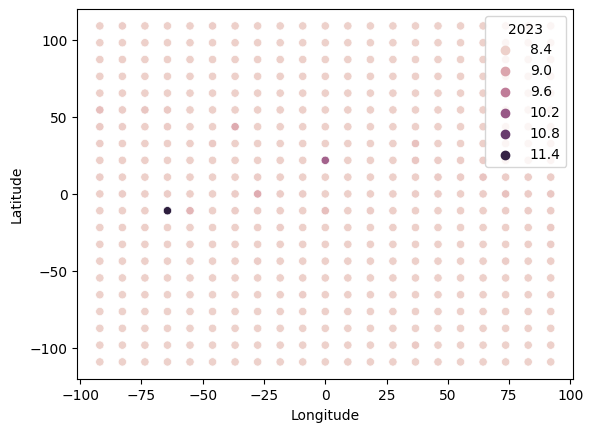

In [95]:
sns.scatterplot(data=energy_df,x='Longitude', y = 'Latitude', hue = (np.log(energy_df[2023])-4.4)/1.5)

In [2]:
#time_df = pd.read_csv('condensed_annual_energy_grid.csv')

time_df.head()

,Latitude,Longitude,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,-109.0,92.0,1.703174e+07,1.412956e+07,2.264741e+07,1.409313e+07,2.565278e+07,2.642953e+07,3.804008e+07,4.803643e+07,8.279087e+07,4.243768e+07,4.633939e+07,5.292802e+07,4.570737e+07,7.838736e+07,9.025911e+07,1.724137e+08,8.747200e+07,7.171581e+07,6.021510e+07,6.964498e+07,5.174133e+07,7.602211e+08,1.767803e+08,2.563286e+08,1.027305e+08,8.012389e+07,6.674412e+07,7.020040e+07,9.151412e+07,7.417004e+07,8.164845e+07,5.102860e+07,6.052261e+07,4.079197e+07,4.203967e+07,2.710277e+07,3.020118e+07,3.089843e+07,3.261627e+07,3.721102e+07,2.930441e+07,3.158257e+07,3.108006e+07,3.160133e+07,3.151456e+07,3.212471e+07,3.194166e+07,3.832533e+07,4.300345e+07,3.750517e+07,2.867739e+07,2.810434e+07,2.373231e+07
1,-109.0,82.8,1.704358e+07,1.413210e+07,2.266365e+07,1.408325e+07,2.562079e+07,2.660458e+07,3.803733e+07,4.798261e+07,8.567427e+07,4.245233e+07,4.631607e+07,5.284470e+07,4.566925e+07,7.828251e+07,9.014267e+07,1.729510e+08,8.769057e+07,7.175553e+07,6.024809e+07,6.969535e+07,5.175029e+07,7.594722e+08,1.766745e+08,2.564503e+08,1.027264e+08,7.822905e+07,6.675252e+07,7.017246e+07,9.149503e+07,7.418200e+07,8.160939e+07,5.105340e+07,6.049851e+07,4.079810e+07,4.199895e+07,2.709834e+07,3.024631e+07,3.088576e+07,3.260637e+07,3.717098e+07,2.925195e+07,3.156504e+07,3.104643e+07,3.160788e+07,3.149050e+07,3.208411e+07,3.187717e+07,3.822669e+07,4.294755e+07,3.735755e+07,2.866099e+07,2.807730e+07,2.372069e+07
2,-109.0,73.6,1.705694e+07,1.413531e+07,2.268037e+07,1.407450e+07,2.559027e+07,2.646181e+07,3.804105e+07,4.792995e+07,8.266873e+07,4.228865e+07,4.629225e+07,5.276355e+07,4.563151e+07,7.818552e+07,9.002739e+07,1.737472e+08,8.800925e+07,7.188914e+07,6.038052e+07,6.976067e+07,5.179869e+07,7.586688e+08,1.765594e+08,2.565718e+08,1.027076e+08,7.816744e+07,6.676635e+07,7.015725e+07,9.148653e+07,7.419280e+07,8.154530e+07,5.105157e+07,6.047371e+07,4.080113e+07,4.196063e+07,2.710616e+07,3.031977e+07,3.088491e+07,3.260448e+07,3.714565e+07,2.920701e+07,3.154965e+07,3.101805e+07,3.161591e+07,3.147347e+07,3.203371e+07,3.181306e+07,3.814830e+07,4.292106e+07,3.727922e+07,2.864370e+07,2.805473e+07,2.371011e+07
3,-109.0,64.4,1.707252e+07,1.414079e+07,2.270048e+07,1.406737e+07,2.556361e+07,2.642083e+07,3.801603e+07,4.788340e+07,8.260403e+07,4.218699e+07,4.626879e+07,5.269203e+07,4.559794e+07,7.811862e+07,8.992348e+07,1.749998e+08,8.851168e+07,7.222903e+07,6.062041e+07,6.985419e+07,5.224336e+07,7.578921e+08,1.764419e+08,2.567003e+08,1.027031e+08,7.816849e+07,6.679162e+07,7.015651e+07,9.155697e+07,7.417769e+07,8.148597e+07,5.099949e+07,6.044765e+07,4.079919e+07,4.193053e+07,2.716243e+07,3.042641e+07,3.090620e+07,3.261442e+07,3.712376e+07,2.917100e+07,3.154081e+07,3.099134e+07,3.162293e+07,3.148685e+07,3.199565e+07,3.175760e+07,3.809341e+07,8.960938e+07,3.730580e+07,2.862896e+07,2.804281e+07,2.370515e+07
4,-109.0,55.2,1.708995e+07,1.415033e+07,2.273021e+07,1.406148e+07,2.553623e+07,2.640402e+07,3.798238e+07,4.785213e+07,8.256613e+07,4.212097e+07,4.625042e+07,5.263475e+07,4.556945e+07,7.809930e+07,8.985196e+07,1.771305e+08,8.939203e+07,7.262657e+07,6.072668e+07,7.000207e+07,5.192253e+07,7.570045e+08,1.763251e+08,2.568482e+08,1.027250e+08,7.821557e+07,6.683544e+07,7.017585e+07,9.149430e+07,7.416307e+07,8.145574e+07,5.096569e+07,6.042985e+07,4.080141e+07,4.191596e+07,2.717931e+07,3.037336e+07,3.093549e+07,3.263927e+07,3.710873e+07,2.914433e+07,3.154376e+07,3.098499e+07,3.162583e+07,3.146963e+07,3.196972e+07,3.171602e+07,3.798031e+07,4.288356e+07,3.718207e+07,2.861909e+07,2.805140e+07,2.371494e+07


In [3]:
time_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440
Latitude,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-1.090000e+02,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-9.810000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-8.720000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-7.630000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-6.540000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-5.450000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-4.360000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+01,-3.270000e+0